In [1]:
# Import pandas & numpy & regular expression
import pandas as pd
import numpy as np
import re
# Sklearn has a helper that makes it easy to do cross validation
from sklearn.cross_validation import cross_val_score
# Import the logistic regression class
from sklearn.linear_model import LogisticRegression
# Import the random forest model class
from sklearn.ensemble import RandomForestClassifier
# Import the gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('data/train.csv', header=0)

In [4]:
train_df[0:10]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000
1,30,7,Friday,60538815980,1,SHOES,8931
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017
5,26,8,Friday,2006618783,2,PAINT AND ACCESSORIES,1017
6,26,8,Friday,2006613743,1,PAINT AND ACCESSORIES,1017
7,26,8,Friday,7004802737,1,PAINT AND ACCESSORIES,2802
8,26,8,Friday,2238495318,1,PAINT AND ACCESSORIES,4501
9,26,8,Friday,2238400200,-1,PAINT AND ACCESSORIES,3565


In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.5+ MB
None


In [13]:
def print_unique(df, list):
    for column in list:
        print("\n Totally there are " + str(len(df[column].unique())) + "  " +df[column].name)
        
print_unique(train_df,["VisitNumber","TripType", "DepartmentDescription", "FinelineNumber" ])


 Totally there are 95674  VisitNumber

 Totally there are 38  TripType

 Totally there are 69  DepartmentDescription

 Totally there are 5196  FinelineNumber


In [22]:
vistors = list(train_df.VisitNumber.unique())
depts = list(train_df.DepartmentDescription.unique())
types = list(train_df.TripType.unique())
types.sort()

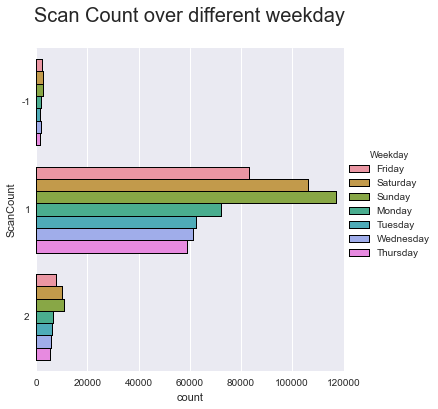

In [15]:
fig_scancount = sns.factorplot( y='ScanCount', data=train_df[  (train_df["ScanCount"] < 3 ) & (train_df["ScanCount"] >= -1 )], \
                     hue = 'Weekday' ,kind='count', size=5, linewidth=1)
sns.plt.title('Scan Count over different weekday \n' , size =20)

In [16]:
#fillna
train_df.DepartmentDescription = train_df.DepartmentDescription.fillna('nan')

## Start training

In [24]:
dept_matrix_train = np.zeros((len(vistors),len(depts)))
print(dept_matrix_train.shape)
trip_type_train = np.zeros((len(vistors),len(types)))
print(trip_type_train.shape)
count_train = np.zeros((len(set(vistors)),1))
print(count_train.shape)

(95674, 69)
(95674, 38)
(95674, 1)


In [25]:
'''print(depts)
tmp = train_df.DepartmentDescription[64000]
print(tmp)
print(depts.index(tmp))
len(vistors)'''

'print(depts)\ntmp = train_df.DepartmentDescription[64000]\nprint(tmp)\nprint(depts.index(tmp))\nlen(vistors)'

In [26]:
i=0
j=0
dept_matrix_train[j,depts.index(train_df.DepartmentDescription[i])] = train_df.ScanCount[i]
trip_type_train[j,types.index(train_df.TripType[i])] = 1
count_train[j] = 1

In [27]:
'''for i in range(1,20):
    if (train_df.VisitNumber[i] != train_df.VisitNumber[i-1]):
        j = j + 1
        trip_type_train[j,types.index(train_df.TripType[i])] = 1
        count_train[j] = 1
    elif (train_df.TripType[i] != train_df.TripType[i-1]):
        print("ERROR! Different trip type assigned for same visit!")
        count_train[j] += 1
    else:
        count_train[j] += 1
    dept_matrix_train[j,depts.index(train_df.DepartmentDescription[i])] += train_df.ScanCount[i]
    
print(count_train[0:10])
print(trip_type_train[0:10])
print("\n dept_matrix_train")
print(dept_matrix_train[0:10])'''

'for i in range(1,20):\n    if (train_df.VisitNumber[i] != train_df.VisitNumber[i-1]):\n        j = j + 1\n        trip_type_train[j,types.index(train_df.TripType[i])] = 1\n        count_train[j] = 1\n    elif (train_df.TripType[i] != train_df.TripType[i-1]):\n        print("ERROR! Different trip type assigned for same visit!")\n        count_train[j] += 1\n    else:\n        count_train[j] += 1\n    dept_matrix_train[j,depts.index(train_df.DepartmentDescription[i])] += train_df.ScanCount[i]\n    \nprint(count_train[0:10])\nprint(trip_type_train[0:10])\nprint("\n dept_matrix_train")\nprint(dept_matrix_train[0:10])'

In [28]:
for i in range(1,len(train_df)):
    if (train_df.VisitNumber[i] != train_df.VisitNumber[i-1]):
        j = j + 1
        trip_type_train[j,types.index(train_df.TripType[i])] = 1
        count_train[j] = 1
    elif (train_df.TripType[i] != train_df.TripType[i-1]):
        print("ERROR! Different trip type assigned for same visit!")
        count_train[j] += 1
    else:
        count_train[j] += 1
    dept_matrix_train[j,depts.index(train_df.DepartmentDescription[i])] += train_df.ScanCount[i]

In [33]:
print('Total transaction count: ' + str(sum(count_train)))


Total transaction count: [ 647054.]


In [34]:
alg = RandomForestClassifier(n_estimators=100, min_samples_split=8, min_samples_leaf=4, n_jobs=-1)

In [35]:
alg.fit(dept_matrix_train, trip_type_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=4, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## test date read in and transform

In [37]:
test_df = pd.read_csv('data/test.csv', header=0)
test_df.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,1,Friday,72503389714,1,SHOES,3002
1,1,Friday,1707710732,1,DAIRY,1526
2,1,Friday,89470001026,1,DAIRY,1431
3,1,Friday,88491211470,1,GROCERY DRY GOODS,3555
4,2,Friday,2840015224,1,DSD GROCERY,4408


In [38]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653646 entries, 0 to 653645
Data columns (total 6 columns):
VisitNumber              653646 non-null int64
Weekday                  653646 non-null object
Upc                      649660 non-null float64
ScanCount                653646 non-null int64
DepartmentDescription    652318 non-null object
FinelineNumber           649660 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 34.9+ MB
None


In [39]:
test_df.DepartmentDescription = test_df.DepartmentDescription.fillna('nan')

In [41]:
dept_matrix_test = np.zeros((len(set(test_df.VisitNumber)),len(depts)))
count_test = np.zeros((len(set(test_df.VisitNumber)),1))
i=0
j=0
dept_matrix_test[j,depts.index(test_df.DepartmentDescription[i])] = test_df.ScanCount[i]
count_test[j] = 1

In [42]:
for i in range(1,len(test_df)):
    if (test_df.VisitNumber[i] != test_df.VisitNumber[i-1]):
        j = j + 1
        count_test[j] = 1
    else:
        count_test[j] += 1
    dept_matrix_test[j,depts.index(test_df.DepartmentDescription[i])] += test_df.ScanCount[i]    

In [43]:
print('Total transaction count: ' + str(sum(count_test)))

Total transaction count: [ 653646.]
